<a href="https://colab.research.google.com/github/atosiroy/CV_Tirana/blob/main/exam_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading all the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_uint
from skimage.util import random_noise
from skimage.filters import gaussian, prewitt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk
from skimage.color import rgb2gray
from scipy import ndimage
import math

import skimage as sk # load skimage libraries


## task 1: Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

<ipython-input-4-ca9dfcd82c8b>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(coin)


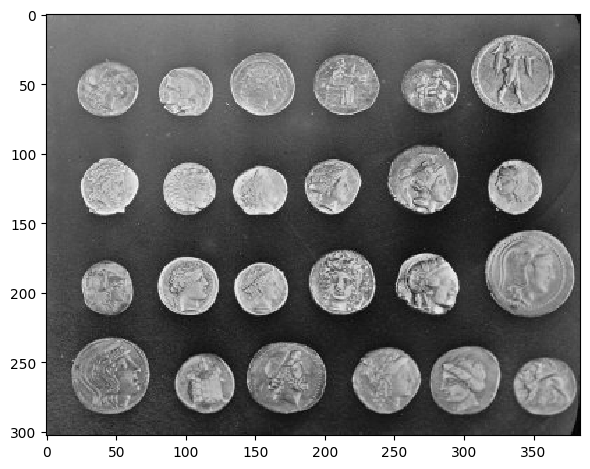

In [4]:
coin = sk.data.coins()
sk.io.imshow(coin)

In [5]:
# image size
coin.shape

(303, 384)

width = 303 and height = 384

In [ ]:
# image pixel range by histogram , min value and max value of grayscale range
# ???

The picture is already in grayscale so we don't need to convert it. The minimum intensity of the coin image is 0 = black and max intensity is 255 = white.

## Task 2 : Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

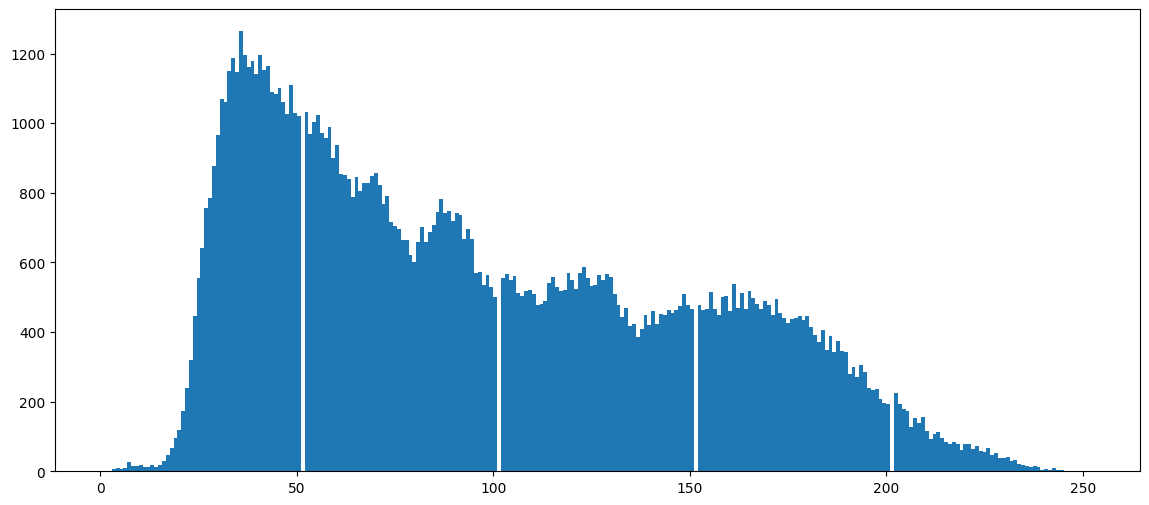

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# reshape the uint8 image as 1d array:
v = coin.reshape(coin.shape[0]*coin.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()


Total number of pixels in the image

In [7]:
coin.shape[0]*coin.shape[1]

116352

*Explanation:* The histogram represents the grayscale distribution of the coins image. It shows multiple peaks. First peak is 0-60 shows dark background area. Then probably 60- 150 shows the mid tones, ( maybe coin edges, indirect lights etc ) and the last one is the main parts of the coins that catches more lights.

## 3. Applied noise to the image and use the correct function to erase the noise.

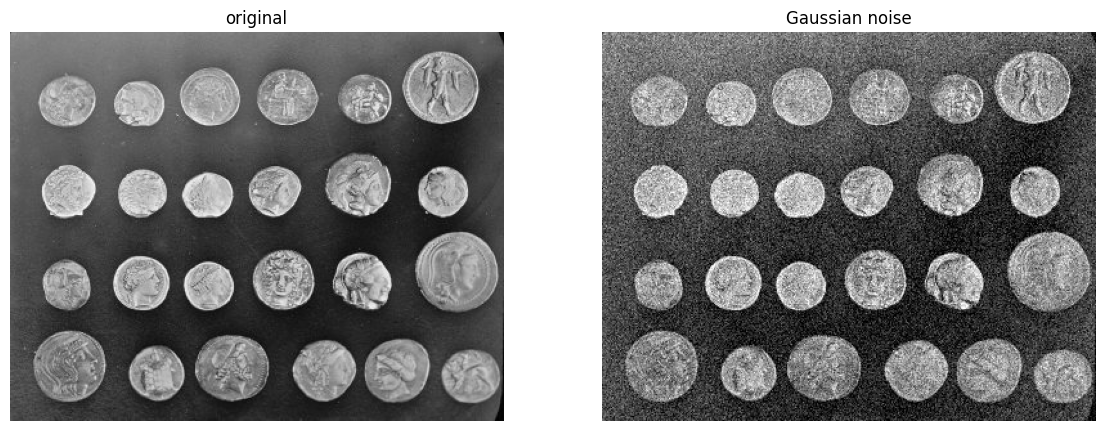

In [14]:
# applying gaussian noise to the image
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage.util import random_noise
from skimage import data, img_as_float

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

img = img_as_float(data.coins())
sigma = 0.1
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

I have applied gaussian noise to the coins image.

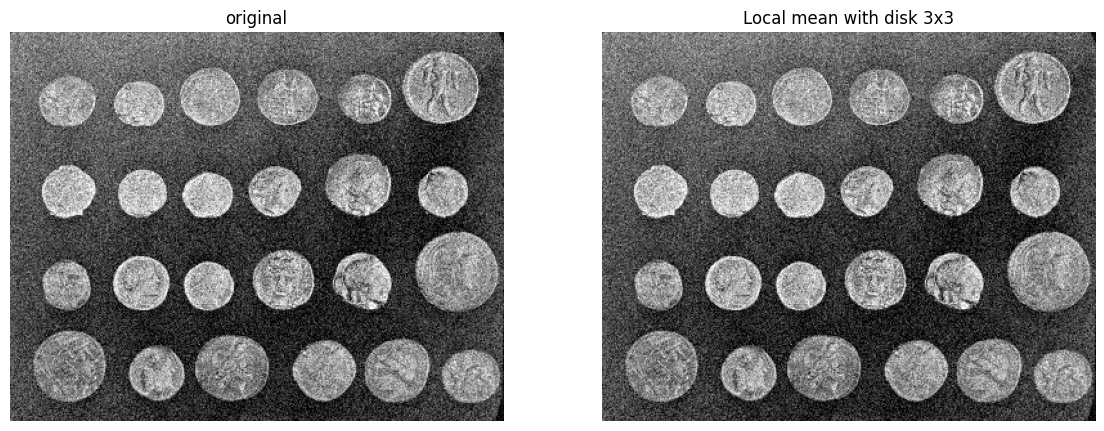

In [21]:
# erasing the noise

# Import the mean_bilateral function.
from skimage.filters.rank import mean_bilateral
from skimage.filters import rank

from skimage import img_as_ubyte

img = img_as_ubyte(noisy_image_normal)

selem = disk(3) # structuring element

# Apply the mean_bilateral filter.
img_locmed = mean_bilateral(img, disk(3), s0=5, s1=5)

plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')


Explanation: Since i applied gaussian noise to the image, i tried applying the bilateral filter that has smoothen the image and also preserved the edges.

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

In [25]:
import numpy as np
I = sk.data.coins()
I.shape

(303, 384)

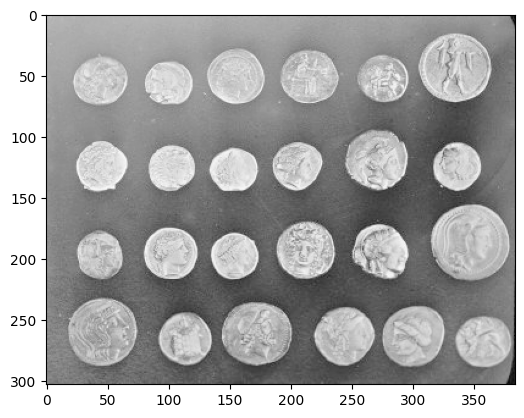

In [26]:
#gamma correction
from skimage import exposure

IC = exposure.adjust_gamma(I, 0.5)
plt.imshow(IC,cmap='gray')

In [33]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(IC)

v_kmeans = kmeans.predict(IC)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
#I_kmeans = np.reshape(v_kmeans,(IC.shape[0],IC.shape[1])) # reshape back to original image size
I_kmeans = v_kmeans.reshape(IC.shape)
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

ValueError: cannot reshape array of size 303 into shape (303,384)

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

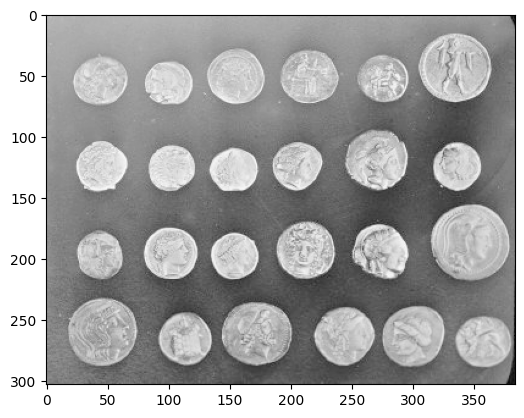

In [34]:
plt.imshow(IC,cmap='gray')

In [39]:
from skimage.filters import threshold_otsu
# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IC)
print(thresh)

154


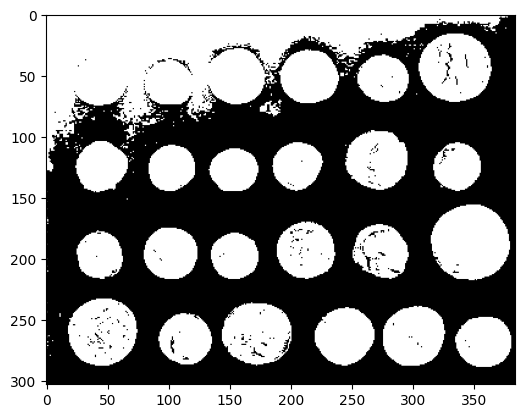

In [43]:
bw = IC > thresh # keep lighter regions with grayscale intensities above threshold
plt.imshow(bw,cmap='gray')

number of regions is 146


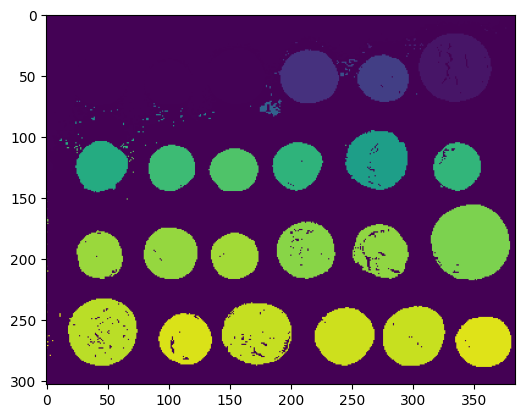

In [44]:
from skimage.measure import label

label_image, nregions = label(bw,return_num=True)

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

I am not sure about the results. Probably I should have done edge detection before. ?

I am guessing it's due to not removing the small objects I got more regions than i should have. I could have applied morphological filter to remove the small objects.


## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

In [45]:
# Extract regional properties (Area and eccentricity)

import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,17997.0,0.966762
1,2,1.0,0.000000
2,3,1.0,0.000000
3,4,1.0,0.000000
4,5,1.0,0.000000


<Axes: xlabel='area', ylabel='eccentricity'>

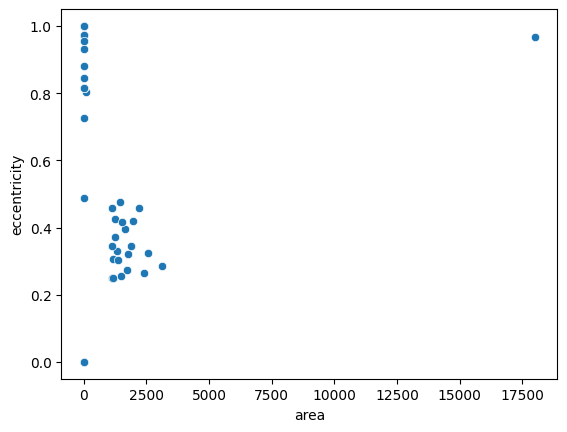

In [46]:
import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

In [47]:
df_coins = df_features.loc[(df_features['area']>500) & (df_features['eccentricity']<0.6)]

df_coins.head()
print('number of idenfitied balloons is {}'.format(df_coins.shape[0]))

number of idenfitied balloons is 21


We have 23 coins, but here we identified 21.

In [49]:
indx_coins = df_coins['label'].values
indx_coins

array([  8,  21,  27,  82,  90,  95,  96, 100, 106, 117, 120, 122, 123,
       124, 126, 131, 133, 134, 135, 138, 139])

In [50]:
import numpy as np
mask_coins = np.isin(label_image,indx_coins)


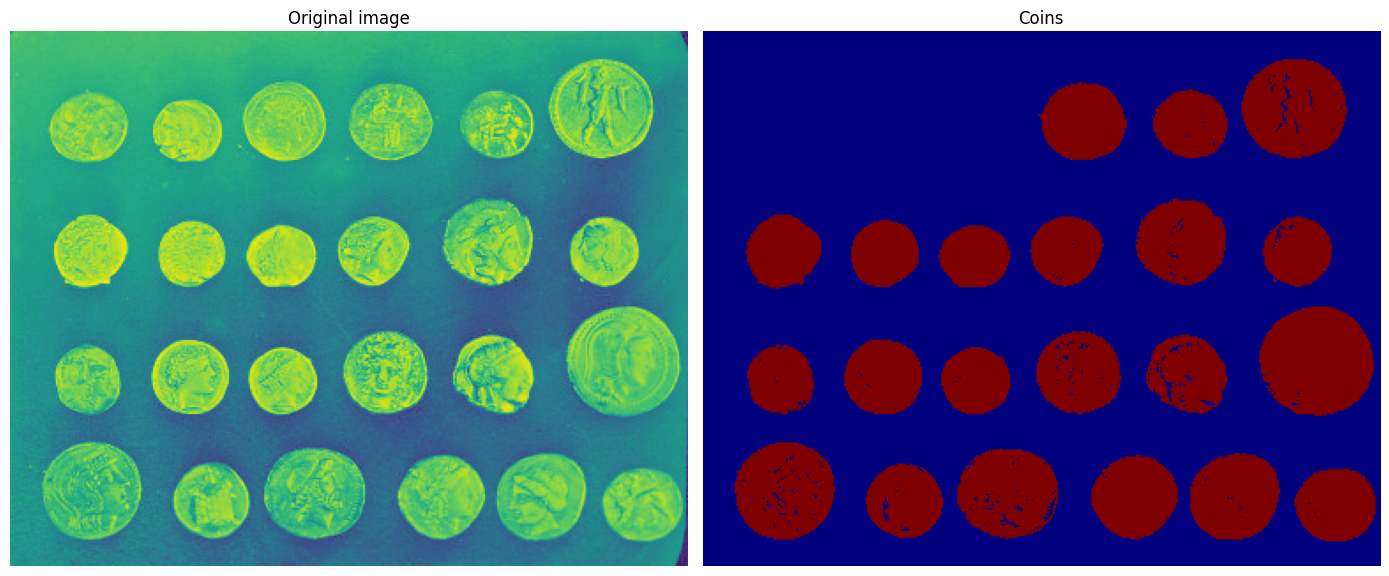

In [52]:
# plot the coins
# Get some figures:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC)
ax[0].set_title('Original image')
ax[1].imshow(mask_coins,cmap=plt.cm.jet)
ax[1].set_title('Coins') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [55]:
from skimage.measure import regionprops
import numpy as np

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

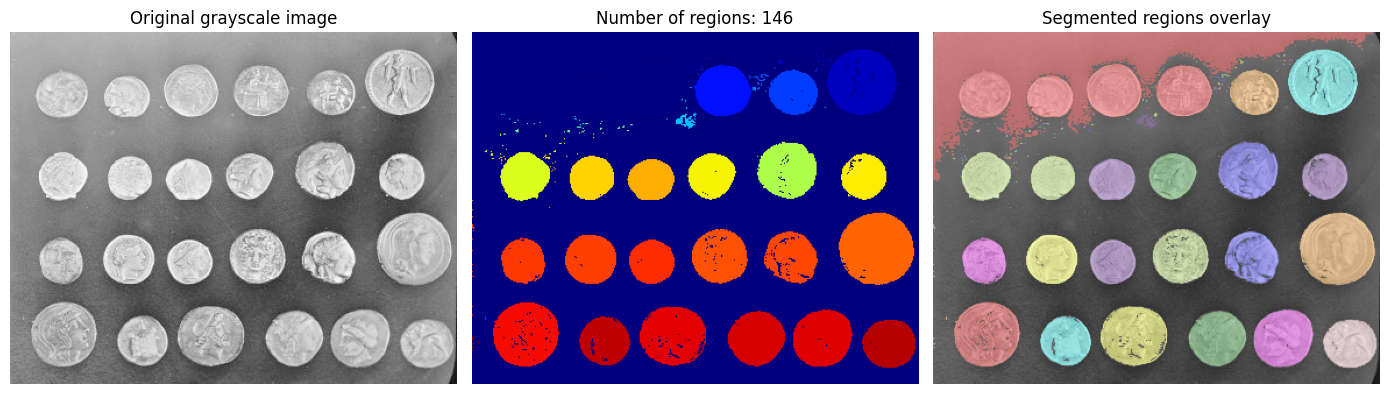

In [59]:
IG = I.squeeze()
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IC)
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [60]:
from skimage.measure import regionprops
import numpy as np



In [62]:

ind_large = np.where(area > 1750)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} large objects'.format(len(area_large)))
print('Large objects correspond to regions: {}'.format(ind_lregions))
print('The areas of the large objects are: {}'.format(area_large))

ind_small = np.where(area < 1750)
area_small = area[ind_small]
ind_sregions = np.array(ind_small)+1
print('There are {} small objects'.format(len(area_small)))
print('Small objects correspond to regions: {}'.format(ind_sregions))
print('The areas of the small objects are {}'.format(area_small))

SyntaxError: invalid syntax (<ipython-input-62-2c48ee9d439f>, line 2)